<a href="https://colab.research.google.com/github/Znerf/diabetes-detection/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
!pip install xgboost==1.7.5


In [86]:
import pandas as pd

import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

In [90]:

df = pd.read_csv('/content/drive/MyDrive/Data/dataset_diabetes.csv')

df = df.dropna(axis=1)
print("Columns with no null values retained:\n", df.columns)
df.head()


Columns with no null values retained:
 Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [91]:
y= df['Diabetes_binary']
X=df.drop('Diabetes_binary',axis=1)



1
Fold 1: Accuracy = 0.6255039253129642
Fold 2: Accuracy = 0.6203409010538228
Fold 3: Accuracy = 0.6201725845239779
Fold 4: Accuracy = 0.6115433583250813
Fold 5: Accuracy = 0.6237091526382799
2
Fold 1: Accuracy = 0.6615743687672395
Fold 2: Accuracy = 0.6682933729400947
Fold 3: Accuracy = 0.6720186730796435
Fold 4: Accuracy = 0.6583675201584382
Fold 5: Accuracy = 0.6698260008487763
3
Fold 1: Accuracy = 0.6714053327675225
Fold 2: Accuracy = 0.6721125963646651
Fold 3: Accuracy = 0.6722308671665016
Fold 4: Accuracy = 0.6643796859527514
Fold 5: Accuracy = 0.6788088838591031
4
Fold 1: Accuracy = 0.7043638163943702
Fold 2: Accuracy = 0.7055661645095127
Fold 3: Accuracy = 0.7114160418729665
Fold 4: Accuracy = 0.6996746357334842
Fold 5: Accuracy = 0.7107087282501061
5
Fold 1: Accuracy = 0.7079001343800835
Fold 2: Accuracy = 0.7083952188980833
Fold 3: Accuracy = 0.7150233413495544
Fold 4: Accuracy = 0.7025038902249258
Fold 5: Accuracy = 0.7126892063941151
6
Fold 1: Accuracy = 0.7218332272437937


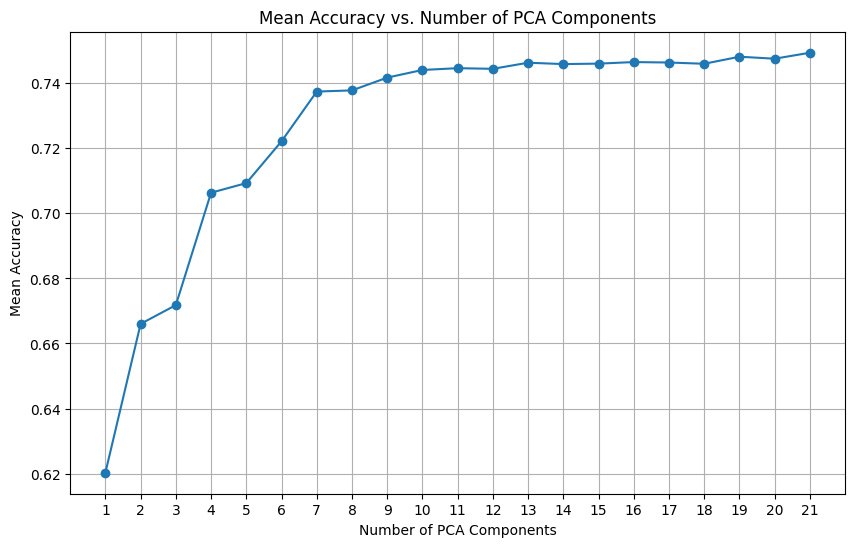

PCA Components: 1, Mean Accuracy: 0.62
PCA Components: 2, Mean Accuracy: 0.67
PCA Components: 3, Mean Accuracy: 0.67
PCA Components: 4, Mean Accuracy: 0.71
PCA Components: 5, Mean Accuracy: 0.71
PCA Components: 6, Mean Accuracy: 0.72
PCA Components: 7, Mean Accuracy: 0.74
PCA Components: 8, Mean Accuracy: 0.74
PCA Components: 9, Mean Accuracy: 0.74
PCA Components: 10, Mean Accuracy: 0.74
PCA Components: 11, Mean Accuracy: 0.74
PCA Components: 12, Mean Accuracy: 0.74
PCA Components: 13, Mean Accuracy: 0.75
PCA Components: 14, Mean Accuracy: 0.75
PCA Components: 15, Mean Accuracy: 0.75
PCA Components: 16, Mean Accuracy: 0.75
PCA Components: 17, Mean Accuracy: 0.75
PCA Components: 18, Mean Accuracy: 0.75
PCA Components: 19, Mean Accuracy: 0.75
PCA Components: 20, Mean Accuracy: 0.75
PCA Components: 21, Mean Accuracy: 0.75


In [95]:
#PCA analysis not good

import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set up K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare to store results for different numbers of PCA components
pca_components = range(1, 22)  # Testing from 1 to 20 components
mean_accuracies = []

# Iterate over different numbers of PCA components
for n_components in pca_components:
    accuracies = []
    print(n_components)

    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      pca = PCA(n_components=n_components)
      X_train = pca.fit_transform(X_train)

      # Transform the test data using the PCA model from the training data
      X_test = pca.transform(X_test)



      # Create DMatrix for XGBoost
      dtrain = xgb.DMatrix(X_train, label=y_train)
      dtest = xgb.DMatrix(X_test, label=y_test)

      # Set parameters for the XGBoost model
      params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'eta': 0.1,
        'max_depth': 3
      }

      # Train the model
      model = xgb.train(params, dtrain, num_boost_round=100)

      # Make predictions on the test set
      y_pred = model.predict(dtest)

      # Evaluate the predictions and store the accuracy score
      accuracy = accuracy_score(y_test, y_pred.round())
      accuracies.append(accuracy)

      print(f"Fold {fold + 1}: Accuracy = {accuracy}")



    # for train_index, test_index in kf.split(X):
    #     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #     # Apply PCA on the training data
    #     pca = PCA(n_components=n_components)
    #     X_train_pca = pca.fit_transform(X_train)

    #     # Transform the test data using the PCA model from the training data
    #     X_test_pca = pca.transform(X_test)

    #     # Train the XGBoost model
    #     model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    #     model.fit(X_train_pca, y_train)

    #     # Make predictions
    #     y_pred = model.predict(X_test_pca)

    #     # Evaluate the model
    #     accuracy = accuracy_score(y_test, y_pred)
    #     accuracies.append(accuracy)

    # Store the mean accuracy for this number of components
    mean_accuracies.append(np.mean(accuracies))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(pca_components, mean_accuracies, marker='o')
plt.title('Mean Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Accuracy')
plt.xticks(pca_components)
plt.grid()
plt.show()

# Output mean accuracies
for n, acc in zip(pca_components, mean_accuracies):
    print(f'PCA Components: {n}, Mean Accuracy: {acc:.2f}')

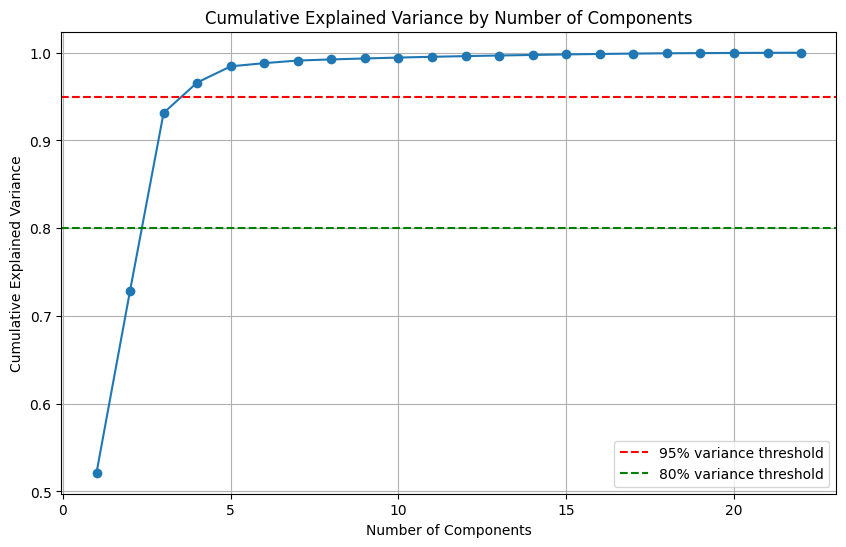

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

# Fit PCA
pca = PCA()
pca.fit(X)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
plt.axhline(y=0.80, color='g', linestyle='--', label='80% variance threshold')
plt.legend()
plt.grid()
plt.show()

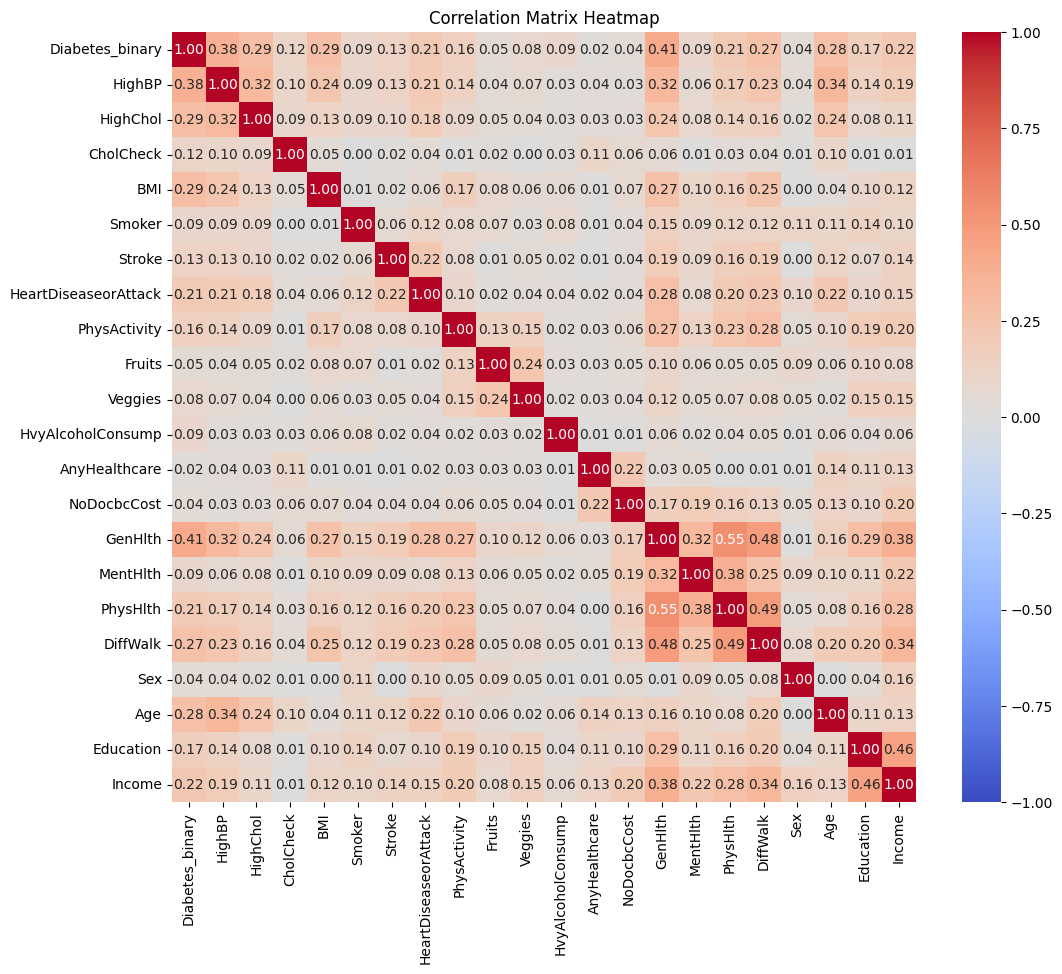

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `df` is your DataFrame with 21 features
# Generate the correlation matrix
correlation_matrix = df.corr().abs()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)

# Show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

In [77]:
# X=X.drop('Income',axis=1)
# X=X.drop('Education',axis=1)
# X=X.drop('PhysActivity',axis=1)
# X=X.drop('Sex',axis=1)

X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,8.0,5.0,8.0


In [78]:
# Create a StratifiedKFold object
n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []

In [79]:
# Iterate through the folds
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Set parameters for the XGBoost model
    params = {
      'objective': 'binary:logistic',
      'eval_metric': 'logloss',
      'eta': 0.1,
      'max_depth': 3
    }

    # Train the model
    model = xgb.train(params, dtrain, num_boost_round=100)

    # Make predictions on the test set
    y_pred = model.predict(dtest)

    # Evaluate the predictions and store the accuracy score
    accuracy = accuracy_score(y_test, y_pred.round())
    accuracy_scores.append(accuracy)

    print(f"Fold {fold + 1}: Accuracy = {accuracy}")


# Fold 1: Accuracy = 0.7524577410000707
# Fold 2: Accuracy = 0.7523162882806422
# Fold 3: Accuracy = 0.7518036497382939
# Fold 4: Accuracy = 0.7514499929268638
# Fold 5: Accuracy = 0.7523695006365823
#  0.7520794345164906

# heatmap
# Fold 1: Accuracy = 0.7516090246834995
# Fold 2: Accuracy = 0.7521748355612137
# Fold 3: Accuracy = 0.7513085302022917
# Fold 4: Accuracy = 0.7503890224925732
# Fold 5: Accuracy = 0.7530768142594426
# Average Accuracy: 0.7517116454398042

#incone and education
# Fold 1: Accuracy = 0.752245561920928
# Fold 2: Accuracy = 0.7523162882806422
# Fold 3: Accuracy = 0.751732918376008
# Fold 4: Accuracy = 0.7502475597680012
# Fold 5: Accuracy = 0.7530060828971566
# Average Accuracy: 0.7519096822485473

Fold 1: Accuracy = 0.7506895820072141
Fold 2: Accuracy = 0.7513968456043567
Fold 3: Accuracy = 0.751945112462866
Fold 4: Accuracy = 0.7486914697977083
Fold 5: Accuracy = 0.7511670674777197


In [80]:
# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {average_accuracy}")

Average Accuracy: 0.750778015469973


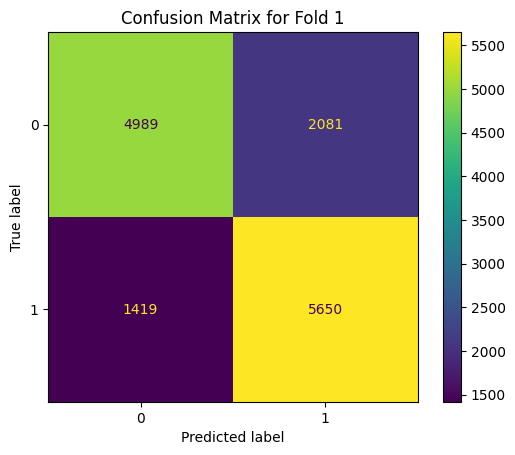

Fold 1: Accuracy = 0.7524577410000707, Log Loss = 0.5003108296326705, AUC = 0.8322314014033823


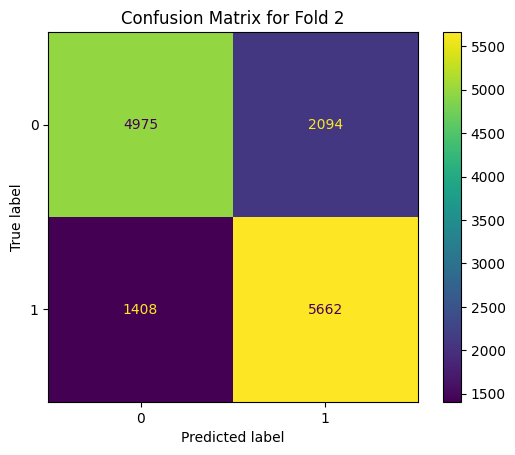

Fold 2: Accuracy = 0.7523162882806422, Log Loss = 0.5067775729144836, AUC = 0.8272256618584681


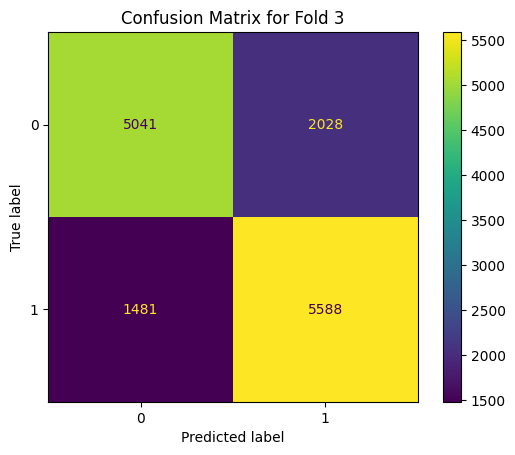

Fold 3: Accuracy = 0.7518036497382939, Log Loss = 0.5007188412180601, AUC = 0.8312684091402972


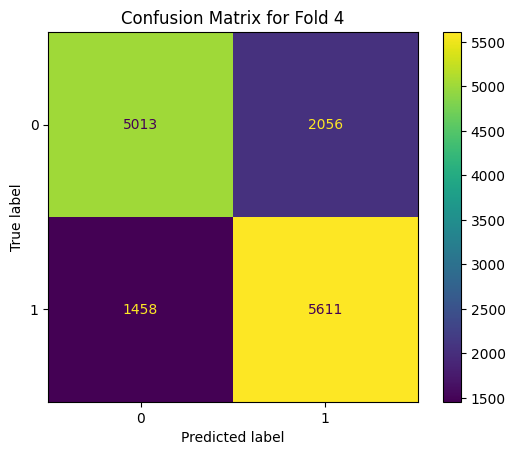

Fold 4: Accuracy = 0.7514499929268638, Log Loss = 0.5037419527263902, AUC = 0.8291952868198265


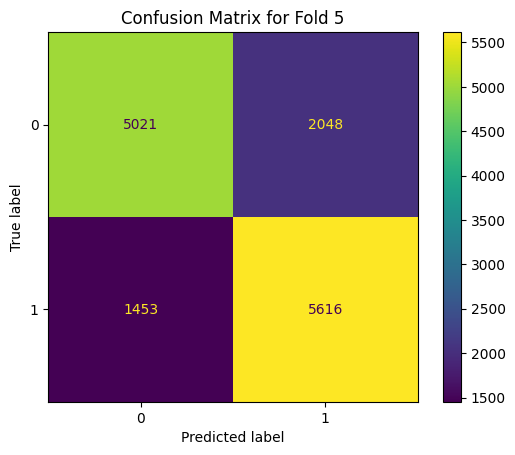

Fold 5: Accuracy = 0.7523695006365823, Log Loss = 0.4989945719148455, AUC = 0.8328057881688053


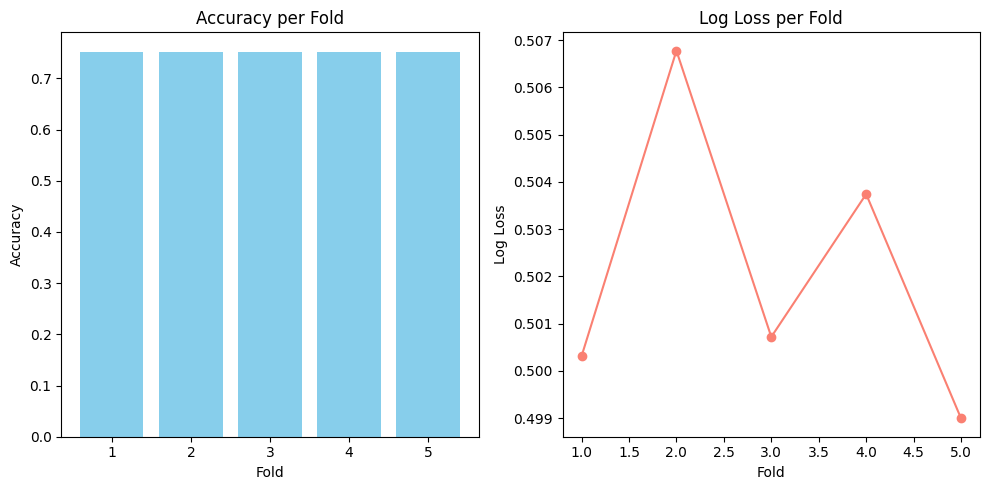

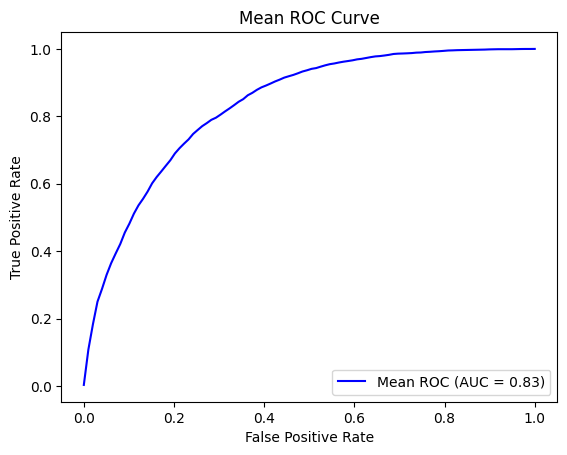

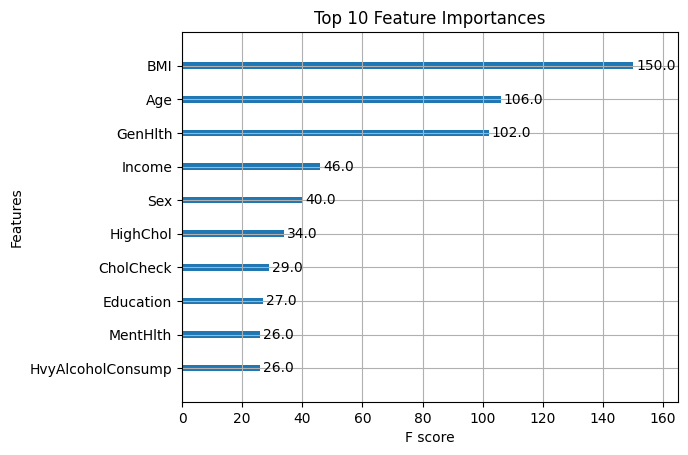

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, log_loss, precision_recall_curve
import xgboost as xgb

# Lists to hold metric values across folds
accuracy_scores = []
roc_auc_scores = []
log_losses = []
precision_scores = []
recall_scores = []
thresholds = []

# Loop for each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Set parameters for the XGBoost model
    params = {
      'objective': 'binary:logistic',
      'eval_metric': 'logloss',
      'eta': 0.1,
      'max_depth': 3
    }

    # Train the model
    model = xgb.train(params, dtrain, num_boost_round=100)

    # Make predictions on the test set
    y_pred_prob = model.predict(dtest)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    logloss_value = log_loss(y_test, y_pred_prob)
    accuracy_scores.append(accuracy)
    log_losses.append(logloss_value)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

    print(f"Fold {fold + 1}: Accuracy = {accuracy}, Log Loss = {logloss_value}, AUC = {roc_auc}")

# Visualization of Accuracy and Log Loss per Fold
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(accuracy_scores)+1), accuracy_scores, color='skyblue')
plt.title("Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(1, len(log_losses)+1), log_losses, marker='o', color='salmon')
plt.title("Log Loss per Fold")
plt.xlabel("Fold")
plt.ylabel("Log Loss")
plt.tight_layout()
plt.show()

# Mean ROC Curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, roc_curve(y_test, y_pred_prob)[0], roc_curve(y_test, y_pred_prob)[1]) for _, (train_index, test_index) in enumerate(skf.split(X, y))], axis=0)
mean_roc_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUC = {mean_roc_auc:.2f})', color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
xgb.plot_importance(model, max_num_features=10, title='Top 10 Feature Importances')
plt.show()
